<a href="https://colab.research.google.com/github/MirandaCarou/Research-Intership-Memory/blob/main/Qutrits_neutrinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pennylane --upgrade
!pip install qiskit --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.0 MB/s eta 0:00:00



Los **qutrits** son sistemas cuánticos en un espacio de Hilbert tridimensional $H_3$. Los qutrits están representados por una superposición de tres estados ortonormales $|1\rangle$, $|2\rangle$ y $|3\rangle$, y la densidad del estado cuántico se puede expresar mediante las matrices de Gell-Mann (generadores de $SU(3)$ ). Esto permite mapear el sistema de tres sabores de neutrinos a un modelo de qutrit y analizar su comportamiento mediante una representación geométrica en una esfera de Poincaré generalizada para $SU(3)$.

La densidad de un qutrit se define como:

$$\rho_{3 \times 3} = \frac{1}{3} \left(I + \sqrt{3} \, \vec{n} \cdot \vec{\lambda}\right)$$,

donde $\vec{n}$ es un vector unitario en un espacio real de ocho dimensiones asociado a los parámetros de los estados de neutrinos, y $\vec{\lambda}$ son las matrices de Gell-Mann.

El cálculo de la **entropía de mezcla** de un estado mixto reducido esimportante para caracterizar el entrelazamiento y las propiedades cuánticas del sistema. La entropía se obtiene como:

$$E(\rho) = -\sum_{i} x_i \log_3(x_i)$$

donde $x_i$ son los autovalores de $\rho$.

In [3]:
import pennylane as qml
import matplotlib.pyplot as plt
from qiskit.quantum_info import DensityMatrix, entropy, Statevector
from IPython.display import display, Math, Latex
import numpy as np


Here’s the list of operators and observables supported with default.qutrit:

    Operators: qml.TRX, qml.TRY, qml.TRZ, qml.THadamard, qml.TShift, qml.TClock, qml.TAdd, qml.TSWAP, qml.QutritBasisState, qml.QutritUnitary, qml.ControlledQutritUnitary
    Observables: qml.THermitian, qml.GellMann


In [4]:
import pennylane as qml
from pennylane import numpy as np
from IPython.display import display, Math

def print_matrix(matrix):
    """Prints a matrix using LaTeX formatting."""

    latex_code = "\\begin{bmatrix}\n"
    for row in matrix:
        latex_code += " & ".join(map(str, row)) + " \\\\\n"  # Format each row
    latex_code += "\\end{bmatrix}"

    display(Math(latex_code))  # Display using IPython's Math function

def pmns_matrix(theta12, theta23, theta13, delta):
    """Genera la matriz PMNS con los parámetros dados."""
    c12, s12 = np.cos(theta12), np.sin(theta12)
    c23, s23 = np.cos(theta23), np.sin(theta23)
    c13, s13 = np.cos(theta13), np.sin(theta13)

    e_minus_idelta = np.exp(-1j * delta)
    e_plus_idelta = np.exp(1j * delta)

    return np.array([
        [c12 * c13, s12 * c13, s13 * e_minus_idelta],
        [-s12 * c23 - c12 * s23 * s13 * e_plus_idelta,
         c12 * c23 - s12 * s23 * s13 * e_plus_idelta,
         s23 * c13],
        [s12 * s23 - c12 * c23 * s13 * e_plus_idelta,
         -c12 * s23 - s12 * c23 * s13 * e_plus_idelta,
         c23 * c13]
    ])

# Parámetros de ejemplo
theta12 = np.pi / 4
theta23 = np.pi / 6
theta13 = np.pi / 8
delta = np.pi / 2

# Crear matriz PMNS
U_pmns = pmns_matrix(theta12, theta23, theta13, delta)

print("Matriz PMNS:")
print_matrix(U_pmns)

U_pmns[0, 0]


Matriz PMNS:


<IPython.core.display.Math object>

tensor(0.65328148+0.j, requires_grad=True)

In [5]:
import pennylane as qml
from pennylane import numpy as np
from IPython.display import display, Math

# Definir dispositivo con 2 wires para dos qutrits
dev = qml.device("default.qutrit", wires=2, shots=None)


"The density matrix ρ3×3 = |ψ⟩⟨ψ| is a 3 × 3 unitary matrix... The qutrit representation of the density matrix uses the eight (Hermitian, traceless) generators of SU(3) as an operator basis called the Gell-Mann matrices."

**Fórmula matriz densidd**


$$\rho_{3 \times 3} = \frac{1}{3}\left(I + \sqrt{3} \, \vec{n} \cdot \vec{\lambda} \right)$$

**Coeficientes expansion**


$$n_j = \frac{\sqrt{3}}{2} \operatorname{Tr}(\rho \lambda_j)$$


In [6]:
def gell_mann_matrices():
    gm1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]], dtype=complex)
    gm2 = np.array([[0, -1j, 0], [1j, 0, 0], [0, 0, 0]], dtype=complex)
    gm3 = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 0]], dtype=complex)
    gm4 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]], dtype=complex)
    gm5 = np.array([[0, 0, -1j], [0, 0, 0], [1j, 0, 0]], dtype=complex)
    gm6 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0]], dtype=complex)
    gm7 = np.array([[0, 0, 0], [0, 0, -1j], [0, 1j, 0]], dtype=complex)
    gm8 = np.array([[1 / np.sqrt(3), 0, 0], [0, 1 / np.sqrt(3), 0], [0, 0, -2 / np.sqrt(3)]], dtype=complex)

    return [gm1, gm2, gm3, gm4, gm5, gm6, gm7, gm8]

"A quantum state in the Hilbert space H3 spanned by the three orthogonal qutrit states is $|ψ⟩ = α|1⟩ + β|2⟩ + γ|3⟩$... where $|α|² + |β|² + |γ|² = 1.$"

-

$$|\nu_e(\theta, \phi, \eta, \xi_1, \xi_2)\rangle = e^{i\xi_1}\cos(\theta)\cos(\phi)|\nu_1\rangle + e^{i\xi_2}\sin(\theta)\cos(\eta)|\nu_2\rangle + \sin(\theta)\sin(\eta)|\nu_3\rangle$$

In [7]:
def neutrino_state(theta, phi, eta, xi1, xi2):
    alpha = np.cos(theta) * np.cos(phi)
    beta = np.sin(theta) * np.cos(eta) + np.cos(theta) * np.sin(phi) * np.sin(eta) * np.exp(1j * xi1)
    gamma = np.sin(theta) * np.sin(eta) - np.cos(theta) * np.sin(phi) * np.cos(eta) * np.exp(1j * xi2)
    return np.array([alpha, beta, gamma])

"Taking the ultra-relativistic limit $L ≈ t (c = 1, ℏ = 1)$ and defining $ξ1 = (E3 − E1)t/ℏ ≈ ∆m²31L/2E$, the normalized time evolved electron neutrino flavour state $|νe(t)⟩$ in qutrit basis can be written as..."

**Fórmula**

$$|\nu_e(t)\rangle = e^{-i \phi_{ij}} |\nu_e(0)\rangle$$

-

$$\phi_{ij} = \frac{\Delta m^2_{ij} L}{2E}, \quad \Delta m^2_{ij} = m_i^2 - m_j^2$$




In [8]:
def evolve_state(state, delta_m2_ij, L, E):
    if len(delta_m2_ij) != len(state) - 1:
        raise ValueError("El tamaño de delta_m2_ij debe ser igual al número de diferencias de masas del estado (3 componentes => 2 diferencias de masa).")

    # Crear un array de fases con longitud igual al estado
    phases = np.ones(len(state), dtype=complex)
    for i in range(len(delta_m2_ij)):
        phases[i] = np.exp(-1j * delta_m2_ij[i] * L / (2 * E))

    # Aplicar las fases al estado
    evolved_state = state * phases
    # Normalizar el estado
    norm = np.linalg.norm(evolved_state)
    if not np.isclose(norm, 1):
        evolved_state /= norm

    return evolved_state


"The density matrix for the state |νe⟩ can now be cast into the form ρ3×3 = |νe⟩⟨νe| = (1/3)(I + √3 n̂·λ⃗)."

**Fórmula**

$$U = \text{QR}(\text{basis})$$

In [9]:
def create_unitary_for_state(state):
    # Asegurarse de que el estado esté normalizado
    if not np.isclose(np.linalg.norm(state), 1):
        raise ValueError("El estado no está normalizado.")

    # Completar con dos vectores ortogonales para formar una base ortonormal
    basis = np.eye(3, dtype=complex)
    basis[:, 0] = state
    q, _ = np.linalg.qr(basis)  # QR decomposition para garantizar ortonormalidad
    return q


"The three-flavour states of a neutrino system can be written in the qutrit basis by identifying the mass eigenstates with the qutrit basis states of the three-dimensional Hilbert space H3."

In [10]:
@qml.qnode(dev)
def neutrinos_circuit(state1, state2):

    unitary1 = create_unitary_for_state(state1)
    unitary2 = create_unitary_for_state(state2)

    # Preparar los estados en el dispositivo
    qml.QutritUnitary(unitary1, wires=0)
    qml.QutritUnitary(unitary2, wires=1)

    # Introducir entrelazamiento
    qml.THadamard(wires=0)
    qml.THadamard(wires=1)
    qml.TAdd(wires=[0, 1])  # Entrelazamiento

    # Retornar matriz de densidad total
    return qml.state()


The study of the Bloch matrix using the density matrix ρ gives useful symmetries in the Bloch-vector space."

**Fórmula matriz densidad**

$$\rho = |\Psi\rangle\langle\Psi|$$


**Fórmula matriz densidad  reducida**

$$\rho_A = \operatorname{Tr}_B(\rho)$$

In [11]:
def reduced_density_matrix(rho, dimA=3, dimB=3):
    """
    Calcula la matriz de densidad reducida del primer sistema (traza parcial).
    """
    rho = rho.reshape((dimA, dimB, dimA, dimB))
    reduced_rho = np.trace(rho, axis1=1, axis2=3)
    return reduced_rho


"The coefficients $cα = (3/2) Tr(ρ3×3λα)$ characterize the density matrix in the $SU(3)$ representation."

**Fórmula**

$$\rho = \frac{1}{3}\left(I + \sum_{i=1}^8 c_i \lambda_i \right)$$

-

$$c_i = \frac{3}{2} \operatorname{Tr}(\rho \lambda_i)$$

In [12]:
def su3_density_matrix(state):
    lambda_matrices = gell_mann_matrices()
    c_alpha = [(3/2) * np.real(np.trace(state @ l)) for l in lambda_matrices]
    return c_alpha

"We calculate the entropy of mixing of the mixed state ρ using the formula ..."

**Fórmula**

$$E(\rho) = -\sum_{i} x_i \log_3(x_i)$$

In [13]:
def entropy_of_mixing(rho):
    eigenvalues = np.linalg.eigvalsh(rho)
    entropy = -np.sum(eigenvalues * np.log(eigenvalues) / np.log(3))
    return entropy

 "The generalized concurrence formula as a measure of two qutrits entanglement has also been studied."

 **Fórmula**

$$C = \max\left(0, \sqrt{\lambda_1} - \sum_{i=2}^d \sqrt{\lambda_i}\right)$$

,

$$\rho_{9 \times 9} = (\mathcal{O}_3 \otimes \mathcal{O}_3) \rho_{9 \times 9}^* (\mathcal{O}_3 \otimes \mathcal{O}_3)$$

In [21]:
def generalized_concurrence(rho):
    dim = rho.shape[0]
    flipped_rho = np.zeros_like(rho, dtype=complex)

    # Crear la versión "spin-flipped" de la matriz de densidad
    for i in range(dim):
        for j in range(dim):
            flipped_rho[i, j] = rho[dim - 1 - i, dim - 1 - j].conjugate()

        # Producto de \rho y flipped_rho
    product = np.dot(rho, flipped_rho)

    # Autovalores del producto
    eigenvalues = np.linalg.eigvalsh(product)
    print(eigenvalues)
    print(eigenvalues[1:])

    # Calcular los autovalores del producto
    eigenvalues = np.linalg.eigvalsh(product)

    eigenvalues = np.sort(eigenvalues)[::-1]  # Orden descendente
    #Aqui voy a trincar a cero los autovalores que sean ligeramente negativos igual por algun desajuste de calclos
    eigenvalues = np.clip(eigenvalues, 0, None)
    # Calcular concurrencia
    concurrence = max(0, np.sqrt(eigenvalues[0]) - sum(np.sqrt(eigenvalues[1:])))
    return concurrence

(<Figure size 600x300 with 1 Axes>, <Axes: >)

Estado completo del sistema de dos qutrits:
[-0.69467848-0.21443969j  0.04689318+0.14863991j -0.54157166+0.37397521j
  0.04633461-0.04590407j  0.07150449+0.00884151j -0.00715984-0.01368644j
  0.00372794+0.00959853j -0.03410269+0.02697373j -0.0467159 -0.01116286j]


Matriz de densidad calculada manualmente:



<IPython.core.display.Math object>



Matriz de densidad reducida del Qutrit 1:



<IPython.core.display.Math object>



Entropía de mezcla del Qutrit 1:

0.056766534606751406

[-2.21544463e-03 -2.00097168e-03 -5.21554231e-05 -4.75973451e-05
  2.50730512e-04  6.33729448e-04  6.45657147e-04  2.36083475e-03
  2.52992144e-03]
[-2.00097168e-03 -5.21554231e-05 -4.75973451e-05  2.50730512e-04
  6.33729448e-04  6.45657147e-04  2.36083475e-03  2.52992144e-03]

Concurrencia Generalizada:
0



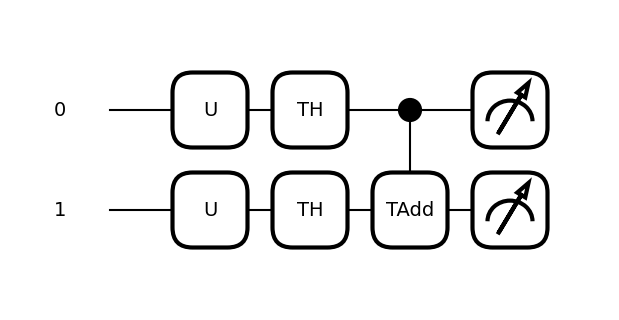

In [27]:
# Parámetros de mezcla
params1 = [np.pi / 4, np.pi / 6, np.pi / 3, 0, np.pi / 2]
params2 = [np.pi / 6, np.pi / 4, np.pi / 3, np.pi / 2, 0]

# Diferencias de masas al cuadrado y parámetros de evolución
delta_m2_ij = np.array([2.4e-3, 7.5e-5])  # Diferencias de masas al cuadrado en eV^2
L = 100  # Distancia recorrida en km
E = 1  # Energía del neutrino en GeV


# Estado inicial
state1 = neutrino_state(*params1)
state2 = neutrino_state(*params2)

# Evolución temporal
state1_evo = evolve_state(state1, delta_m2_ij, L, E)
state2_evo = evolve_state(state2, delta_m2_ij, L, E)


# Obtener el estado del sistema
state = neutrinos_circuit(state1_evo, state2_evo)
print(qml.draw_mpl(neutrinos_circuit, wire_order=[0,1], show_all_wires=True, decimals=1)(state1_evo, state2_evo))
print()
print("Estado completo del sistema de dos qutrits:")
print(state)
print()
# Calcular la matriz de densidad
rho = np.outer(state, np.conj(state))  # Matriz de densidad total
print("\nMatriz de densidad calculada manualmente:")
print()
print_matrix(rho.real)
print()

# Matriz de densidad reducida
reduced_rho_matrix_qutrit1 = reduced_density_matrix(rho)
print("\nMatriz de densidad reducida del Qutrit 1:")
print()
print_matrix(reduced_rho_matrix_qutrit1.real)
print()
# Coeficientes SU(3)
su3_reduced_rho = su3_density_matrix(reduced_rho_matrix_qutrit1)

# Entropía de mezcla
entropy_qutrit1 = entropy_of_mixing(reduced_rho_matrix_qutrit1)
print("\nEntropía de mezcla del Qutrit 1:")
print()
print(entropy_qutrit1.real)
print()
# Concurrencia Generalizada
concurrence_value = generalized_concurrence(rho)
print("\nConcurrencia Generalizada:")
print(concurrence_value)
print()



# **RESULTADOS**

- El estado completo del sistema de dos qutrits se muestra como un vector complejo de dimensión 9, lo cual es correcto para un sistema de dos qutrits. La representación de este estado depende de los parámetros de mezcla $\theta, \phi, \eta, \xi_1, \xi_2\$, así como de la evolución temporal. Este vector parece adecuado y no presenta anomalías.

- La **matriz de densidad** parece una matriz compleja, que es esperada. El estado total de dos qutrits tiene que ser una combinación de amplitudes complejas en las distintas bases. Aunque, el hecho de que la matriz de densidad sea principalmente diagonal y tenga elementos no cero fuera de la diagonal podría indicar que hay correlaciones, pero aún se necesita más información para determinar si hay entrelazamiento.

- La **matriz de densidad reducida del primer qutrit** también muestra componentes no diagonales, lo que es una buena señal de que existen correlaciones entre los dos qutrits. Sin embargo, los valores fuera de la diagonal son pequeños, lo que sugiere que el grado de entrelazamiento no es muy fuerte. La entropía de mezcla también es relativamente baja, lo que podría indicar que el sistema no está completamente mezclado.

- La **entropía de mezcla** $S = 0.0568$ es pequeña, lo que indica que el qutrit 1 no está en un estado completamente mixto, pero tampoco en un estado puro (para un estado puro, la entropía sería cero). Esto podría estar de acuerdo con un estado cuántico entrelazado parcial, donde hay algo de coherencia, pero también algo de decoherencia.

- $C = 0$ . En sistemas mixtos la **concurrencia puede** ser cero, incluso si hay correlaciones. Esto es posible si el estado total del sistema no es completamente entrelazado, es decir, aunque haya algo de correlación entre los qutrits, no hay entrelazamiento cuántico puro.

### **Conclusión**
- Los resultados **son consistentes** con el caso en que los dos qutrits están **parcialmente entrelazados o no completamente entrelazados**. El estado del sistema es **parcialmente mezclado** o las correlaciones no son lo suficientemente fuertes como para generar entrelazamiento cuántico significativo.
- La **entropía de mezcla** también sugiere que el sistema no es completamente puro y no está completamente mezclado.





#Prueba con un circuito diferente y puertas más arbitrarías

( *Puramente experimental* )

In [24]:
@qml.qnode(dev)
def circuit_more_entangled(state1, state2):

        state1 = state1 / np.linalg.norm(state1)
        state2 = state2 / np.linalg.norm(state2)

        # Unitaries para preparar los estados iniciales
        unitary1 = create_unitary_for_state(state1)
        unitary2 = create_unitary_for_state(state2)

        qml.QutritUnitary(unitary1, wires=0)
        qml.QutritUnitary(unitary2, wires=1)

        # Entrelazamiento adicional
        qml.THadamard(wires=0)
        qml.THadamard(wires=1)
        qml.TAdd(wires=[0, 1])

        # Introducir rotaciones en ambos qutrits
        qml.TRX(np.pi / 4, wires=0)
        qml.TRY(np.pi / 3, wires=1)
        qml.TShift(wires=0)

        qml.TClock(wires=1)

        return qml.state()

(<Figure size 800x300 with 1 Axes>, <Axes: >)

Estado completo del sistema de dos qutrits:
[ 0.02027983-0.00517429j -0.01055167-0.03804237j  0.01369063+0.04603859j
 -0.59438125-0.24191068j  0.15561026-0.24413633j  0.55438388+0.26372506j
 -0.09546754+0.19838626j -0.13283877+0.02358522j  0.10028399-0.21551479j]


Matriz de densidad calculada manualmente:



<IPython.core.display.Math object>



Matriz de densidad reducida del Qutrit 1:



<IPython.core.display.Math object>



Entropía de mezcla del Qutrit 1:

0.056766534606751164

[-0.10538578 -0.08481829 -0.02246807 -0.00697007 -0.00695837  0.00597492
  0.00597558  0.04067702  0.9490815 ]
[-0.08481829 -0.02246807 -0.00697007 -0.00695837  0.00597492  0.00597558
  0.04067702  0.9490815 ]

Concurrencia Generalizada:
0.6179231917300538



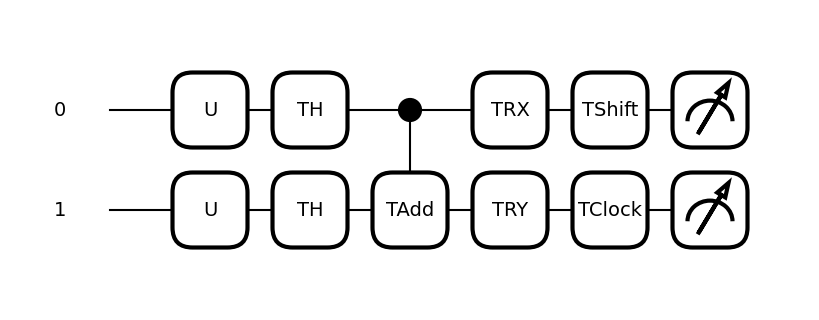

In [25]:
# Parámetros de mezcla
params1 = [np.pi / 4, np.pi / 6, np.pi / 3, 0, np.pi / 2]
params2 = [np.pi / 6, np.pi / 4, np.pi / 3, np.pi / 2, 0]

# Diferencias de masas al cuadrado y parámetros de evolución
delta_m2_ij = np.array([2.4e-3, 7.5e-5])
L = 100
E = 1


# Estado inicial
state1 = neutrino_state(*params1)
state2 = neutrino_state(*params2)

# Evolución temporal
state1_evo = evolve_state(state1, delta_m2_ij, L, E)
state2_evo = evolve_state(state2, delta_m2_ij, L, E)


# Obtener el estado del sistema
state = circuit_more_entangled(state1_evo, state2_evo)
print(qml.draw_mpl(circuit_more_entangled)(state1_evo, state2_evo))
print()
print("Estado completo del sistema de dos qutrits:")
print(state)
print()
# Calcular la matriz de densidad
rho = np.outer(state, np.conj(state))  # Matriz de densidad total
print("\nMatriz de densidad calculada manualmente:")
print()
print_matrix(rho.real)
print()

# Matriz de densidad reducida
reduced_rho_matrix_qutrit1 = reduced_density_matrix(rho)
print("\nMatriz de densidad reducida del Qutrit 1:")
print()
print_matrix(reduced_rho_matrix_qutrit1.real)
print()
# Coeficientes SU(3)
su3_reduced_rho = su3_density_matrix(reduced_rho_matrix_qutrit1)

# Entropía de mezcla
entropy_qutrit1 = entropy_of_mixing(reduced_rho_matrix_qutrit1)
print("\nEntropía de mezcla del Qutrit 1:")
print()
print(entropy_qutrit1.real)
print()
# Concurrencia Generalizada
concurrence_value = generalized_concurrence(rho)
print("\nConcurrencia Generalizada:")
print(concurrence_value)
print()
